# Interests
The effect of interests on the decisions of subjects partners is studied. Research questions include:
1. What are the interests by gender?
3. What were the associations between subject's interests and partner's decision?
5. What was the association between the correlation of interests and subject decision?

## Interests by Gender.
There was a statistically significant difference in level of interest in the activities surveyed.  For female participants, the top 5 interests include:
-	Movies
-	Dining
-	Music
-	Reading
-	Theater
Yet higher interest in movies, reading and theater on the part of their male participants was associated with a negative choice.
For males, the top 5 interests were:
-	Music
-	Movies
-	Reading
-	Dining
-	Sports
Similar incongruence was observed as higher interest in music on the behalf of their female counterparts was associated with a negative decision.  
Such observations must be tempered given the potential influence of confounding factors.

## Male Interests and Female Decisions 
Eleven male interests had statistically significant associations with the decisions of their female partners.
1. Sports (positive association)
2. Clubbing (positive association)
3. Dining (positive association)
4. TV (negative association)
5. Exercise (positive association)
6. Music (positive association)
7. Gaming (negative association)
8. Movies (negative association)
9. Theater (negative association)
10. TV Sports (positive association)
11. Reading (negative association)
One might have anticipated negative associations with gaming, TV and perhaps movies; however, it was interesting that higher levels of interest in reading and theater were associated negatively with the decisions of female participants. (Especially since theater was a top 5 interest for females. At any rate, sports was nearly twice as signficant as clubbing, the second most significant interest.

## Female Interests and Male Decisions
Six activities had a statistically significant association with decision for males. In order of significance.
1. Exercise (Positive)
2. Sports (Positive)
3. Theater (Negative)
4. TV (Negative)
5. Concerts (Negative)
6. TV Sports (Negative)
7. Hiking (Positive)
8. Music (Negative)
9. Clubbing (Positive)
Strange was the positive association of clubbing, and negative associations of concert and music (especially since music was a top 5 interest for males) At any rate, two most significant activities were exercise and sports. They were the only activities with double digit significance.

In [1]:
# libraries
%matplotlib inline

import os
import sys
import inspect

currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
notebookdir = os.path.dirname(currentdir)
projdir = os.path.dirname(notebookdir)
srcdir = os.path.join(projdir,"src")

sys.path.insert(0,notebookdir)
sys.path.insert(0,projdir)
sys.path.insert(0,srcdir)

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import numpy as np
import pandas as pd
pd.set_option('display.max_colwidth', 500)
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

from data import read
from shared import directories
sys.path.append(directories.ANALYSIS_DIR)
sys.path.append(directories.UTILITIES_DIR)
from analysis import trivariate

import univariate, bivariate, independence, visual, description
import warnings
warnings.filterwarnings('ignore')

## Data

In [2]:
# Get Data
sd = read.read()
df = sd['all']
df_male = sd['male']
df_female = sd['female']
# Columns of interest
interests = ['sports', 'tvsports', 'exercise', 'dining', 'museums', 'art', 'hiking', 'gaming', 'clubbing',
             'reading', 'tv', 'theater', 'movies','concerts', 'music', 'shopping', 'yoga']
interests_gender = ['gender', 'sports', 'tvsports', 'exercise', 'dining', 'museums', 'art', 'hiking', 'gaming', 'clubbing',
             'reading', 'tv', 'theater', 'movies','concerts', 'music', 'shopping', 'yoga']
interests_dec = ['sports', 'tvsports', 'exercise', 'dining', 'museums', 'art', 'hiking', 'gaming', 'clubbing',
             'reading', 'tv', 'theater', 'movies','concerts', 'music', 'shopping', 'yoga', 'dec_o']

# Data containing independent and various dependent variables
df_interests = df[interests]
df_interests_gender = df[interests_gender]
df_interests_dec = df[interests_dec]
df_male_interests = df_male[interests]
df_female_interests = df_female[interests]
df_male_interests_dec = df_male[interests_dec]
df_female_interests_dec = df_female[interests_dec]

# Long Form Data
df_interests_gender_long = pd.melt(df_interests_gender,id_vars=['gender'], 
                            value_vars=interests, 
                            var_name='Activity', value_name='Interest')
df_interests_dec_long = pd.melt(df_interests_dec,id_vars=['dec_o'], 
                            value_vars=interests, 
                            var_name='Activity', value_name='Interest')
df_male_interests_dec_long = pd.melt(df_male_interests_dec,id_vars=['dec_o'], 
                            value_vars=interests, 
                            var_name='Activity', value_name='Interest')
df_female_interests_dec_long = pd.melt(df_female_interests_dec,id_vars=['dec_o'], 
                            value_vars=interests, 
                            var_name='Activity', value_name='Interest')

## Univariate Analysis
The univariate analysis shows that we have 79 missing values. Interests ranged from 1 to 10, with a grand mean of 6.3.

In [3]:
d = description.describe_quant_df(df_interests)
mean_interest = np.mean(d['mean'])
mean_interest
d

6.260017153023397

,count,missing,min,25%,mean,50%,75%,max,sd,skew,kurtosis,normality_p,normality
sports,8299.0,79,1.0,4.0,6.425232,7.0,9.0,10.0,0.096646,-10.151855,101.060152,0.0,Reject H0
tvsports,8299.0,79,1.0,2.0,4.575491,4.0,7.0,10.0,0.096646,-10.151855,101.060152,0.0,Reject H0
exercise,8299.0,79,1.0,5.0,6.245813,6.0,8.0,10.0,0.096646,-10.151855,101.060152,0.0,Reject H0
dining,8299.0,79,1.0,7.0,7.783829,8.0,9.0,10.0,0.096646,-10.151855,101.060152,0.0,Reject H0
museums,8299.0,79,0.0,6.0,6.985781,7.0,9.0,10.0,0.096646,-10.151855,101.060152,0.0,Reject H0
art,8299.0,79,0.0,5.0,6.714544,7.0,8.0,10.0,0.096646,-10.151855,101.060152,0.0,Reject H0
hiking,8299.0,79,0.0,4.0,5.737077,6.0,8.0,10.0,0.096646,-10.151855,101.060152,0.0,Reject H0
gaming,8299.0,79,0.0,2.0,3.881191,3.0,6.0,14.0,0.096646,-10.151855,101.060152,0.0,Reject H0
clubbing,8299.0,79,0.0,4.0,5.745993,6.0,8.0,10.0,0.096646,-10.151855,101.060152,0.0,Reject H0
reading,8299.0,79,1.0,7.0,7.678515,8.0,9.0,13.0,0.096646,-10.151855,101.060152,0.0,Reject H0


## Interests by Gender 
There was a statistically significant difference in interests between the genders. However, 4 of the top 5 interests where the same: movies, reading, dining, music. Number 5 for females theatre, for males, sports.

### Interests by Gender Data

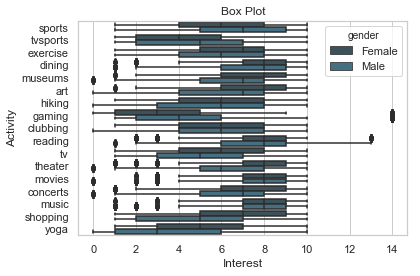

,sum_sq,df,F,PR(>F),eta_sq,omega_sq
Terms,,,,,,
Activity,207470.332542,16.0,2463.96,0,0.21175,0.211663
gender,7168.213410,1.0,1362.1,9.55109e-297,0.00731607,0.00731066
Activity:gender,22862.084021,16.0,271.514,0,0.0233337,0.0232476
Residuals,742288.900785,141049.0,,,,


,Test,Dependent,Independent,Statistic,Statistic Value,p-Value,H0
0,Kruskal,theater,gender,H-Statistic,959.015135,1.455744e-210,Reject
0,Kruskal,shopping,gender,H-Statistic,890.478422,1.152682e-195,Reject
0,Kruskal,yoga,gender,H-Statistic,505.862080,5.040978e-112,Reject
0,Kruskal,gaming,gender,H-Statistic,444.185497,1.329017e-98,Reject
0,Kruskal,sports,gender,H-Statistic,441.709713,4.595665e-98,Reject
0,Kruskal,art,gender,H-Statistic,386.310125,5.262319e-86,Reject
0,Kruskal,museums,gender,H-Statistic,381.719354,5.255730e-85,Reject
0,Kruskal,dining,gender,H-Statistic,349.297006,6.028745e-78,Reject
0,Kruskal,tv,gender,H-Statistic,243.449444,6.959767e-55,Reject
0,Kruskal,movies,gender,H-Statistic,222.081646,3.179310e-50,Reject


In [4]:
i, d, p = trivariate.analysis(df_interests_gender_long, x='Activity', y='Interest', z='gender')
p
i
k = independence.Kruskal()
k.kruskal_table(df_interests_gender, sort=True)

### Interest by Gender (Males)
Here we have the interests ranked by mean

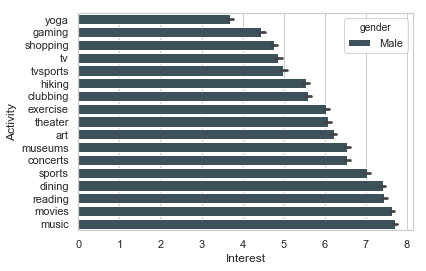

In [5]:
df_male_interests = df_interests_gender_long[df_interests_gender_long['gender']=='Male']
df_male_interests_grouped = df_male_interests.groupby(['Activity'])['Interest'].aggregate(np.mean).reset_index().sort_values('Interest')
sns.barplot(x='Interest', y='Activity', hue='gender', data=df_male_interests, order = df_male_interests_grouped['Activity'])

### Interest by Gender (Females)
Here we have the interests ranked by mean

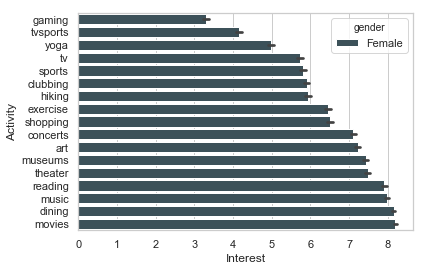

In [6]:
df_female_interests = df_interests_gender_long[df_interests_gender_long['gender']=='Female']
df_female_interests_grouped = df_female_interests.groupby(['Activity'])['Interest'].aggregate(np.mean).reset_index().sort_values('Interest')
sns.barplot(x='Interest', y='Activity', hue='gender', data=df_female_interests, order = df_female_interests_grouped['Activity'])

## Interests by Decision 
Overall ten activities had a statistically significant association with decision. The activities with the greatest significance, in order of significance were:
1. Exercise (positive association)
2. Clubbing (positive association)
3. Sports (positive association)
4. Dining (positive association)
5. Shopping (positive association)
6. Gaming (negative association)
7. TV (negative association)
8. Yoga (positive association)
9. Hiking (positive association)
10. Art (positive association)
The remaining activities had no statistically significant association with decision.

## Interests and Decision 

,Test,Dependent,Independent,Statistic,Statistic Value,p-Value,H0
0,Kruskal,exercise,dec_o,H-Statistic,59.883845,1.006240e-14,Reject
0,Kruskal,clubbing,dec_o,H-Statistic,31.577068,1.916798e-08,Reject
0,Kruskal,sports,dec_o,H-Statistic,28.847323,7.831406e-08,Reject
0,Kruskal,dining,dec_o,H-Statistic,28.684267,8.519304e-08,Reject
0,Kruskal,shopping,dec_o,H-Statistic,21.855608,2.939562e-06,Reject
0,Kruskal,gaming,dec_o,H-Statistic,20.083763,7.412332e-06,Reject
0,Kruskal,tv,dec_o,H-Statistic,10.872464,9.760461e-04,Reject
0,Kruskal,yoga,dec_o,H-Statistic,7.996777,4.686068e-03,Reject
0,Kruskal,hiking,dec_o,H-Statistic,6.817065,9.029084e-03,Reject
0,Kruskal,art,dec_o,H-Statistic,5.784807,1.616527e-02,Reject


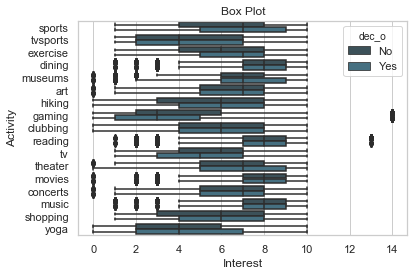

,sum_sq,df,F,PR(>F),eta_sq,omega_sq
Terms,,,,,,
Activity,207470.332542,16.0,2372.14,0,0.21175,0.211659
dec_o,222.901005,1.0,40.7771,1.71153e-10,0.000227499,0.000221919
Activity:dec_o,1075.317221,16.0,12.2948,3.87468e-33,0.0010975,0.00100823
Residuals,771020.979990,141049.0,,,,


,Activity,dec_o,count,missing,min,25%,mean,50%,75%,max,sd,skew,kurtosis,normality_p,normality
Interest,art,No,4828.0,35,0.0,5.0,6.666943,7.0,8.0,10.0,0.08453,-11.659764,133.950107,0.0,Reject H0
Interest,art,Yes,3471.0,44,0.0,5.0,6.780755,7.0,8.0,10.0,0.11118,-8.769210,74.899040,0.0,Reject H0
Interest,clubbing,No,4828.0,35,0.0,4.0,5.624482,6.0,8.0,10.0,0.08453,-11.659764,133.950107,0.0,Reject H0
Interest,clubbing,Yes,3471.0,44,0.0,4.0,5.915010,6.0,8.0,10.0,0.11118,-8.769210,74.899040,0.0,Reject H0
Interest,concerts,No,4828.0,35,0.0,5.0,6.826015,7.0,8.0,10.0,0.08453,-11.659764,133.950107,0.0,Reject H0
Interest,concerts,Yes,3471.0,44,0.0,5.0,6.824546,7.0,8.0,10.0,0.11118,-8.769210,74.899040,0.0,Reject H0
Interest,dining,No,4828.0,35,1.0,7.0,7.692005,8.0,9.0,10.0,0.08453,-11.659764,133.950107,0.0,Reject H0
Interest,dining,Yes,3471.0,44,1.0,7.0,7.911553,8.0,9.0,10.0,0.11118,-8.769210,74.899040,0.0,Reject H0
Interest,exercise,No,4828.0,35,1.0,4.0,6.076636,6.0,8.0,10.0,0.08453,-11.659764,133.950107,0.0,Reject H0
Interest,exercise,Yes,3471.0,44,1.0,5.0,6.481129,7.0,8.0,10.0,0.11118,-8.769210,74.899040,0.0,Reject H0


In [11]:
k.kruskal_table(df_interests_dec, sort=True)
i, d, p = trivariate.analysis(df_interests_dec_long, x='Activity', y='Interest', z='dec_o')
p
i
d


### Male Interests and Female Decisions
Eleven male interests had statistically significant associations with the decisions of their female partners.
1. Sports (positive association)
2. Clubbing (positive association)
3. Dining (positive association)
4. TV (negative association)
5. Exercise (positive association)
6. Music (positive association)
7. Gaming (negative association)
8. Movies (negative association)
9. Theater (negative association)
10. TV Sports (positive association)
11. Reading (negative association)
One might have anticipated negative associations with gaming, TV and perhaps movies; however, it was interesting that higher levels of interest in reading and theater were associated negatively with the decisions of female participants. At any rate, sports was nearly twice as signficant as clubbing, the second most significant interest.

,Test,Dependent,Independent,Statistic,Statistic Value,p-Value,H0
0,Kruskal,sports,dec_o,H-Statistic,48.073987,4.104357e-12,Reject
0,Kruskal,clubbing,dec_o,H-Statistic,25.018956,5.676944e-07,Reject
0,Kruskal,dining,dec_o,H-Statistic,21.139944,4.269355e-06,Reject
0,Kruskal,tv,dec_o,H-Statistic,15.540458,8.075823e-05,Reject
0,Kruskal,exercise,dec_o,H-Statistic,15.396233,8.716186e-05,Reject
0,Kruskal,music,dec_o,H-Statistic,12.472591,4.129668e-04,Reject
0,Kruskal,gaming,dec_o,H-Statistic,8.571490,3.414677e-03,Reject
0,Kruskal,movies,dec_o,H-Statistic,6.675850,9.772789e-03,Reject
0,Kruskal,theater,dec_o,H-Statistic,6.309167,1.201152e-02,Reject
0,Kruskal,tvsports,dec_o,H-Statistic,5.443014,1.964674e-02,Reject


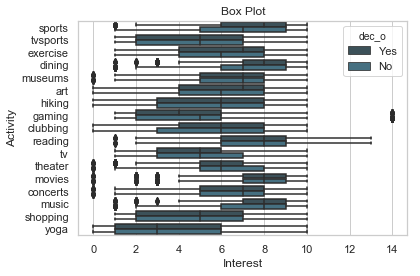

,sum_sq,df,F,PR(>F),eta_sq,omega_sq
Terms,,,,,,
Activity,97528.151893,16.0,1110.56,0,0.19996,0.199778
dec_o,69.579311,1.0,12.6768,0.000370458,0.000142657,0.000131402
Activity:dec_o,859.909748,16.0,9.79182,4.03848e-25,0.00176306,0.00158298
Residuals,389280.720332,70924.0,,,,


,Activity,dec_o,count,missing,min,25%,mean,50%,75%,max,sd,skew,kurtosis,normality_p,normality
Interest,art,No,2659.0,6,0.0,4.0,6.190297,6.0,8.0,10.0,0.047396,-21.004022,439.168923,0.0,Reject H0
Interest,art,Yes,1515.0,14,0.0,4.0,6.259406,7.0,8.0,10.0,0.095250,-10.306480,104.223527,0.0,Reject H0
Interest,clubbing,No,2659.0,6,0.0,3.0,5.462580,6.0,8.0,10.0,0.047396,-21.004022,439.168923,0.0,Reject H0
Interest,clubbing,Yes,1515.0,14,0.0,4.0,5.824422,6.0,8.0,10.0,0.095250,-10.306480,104.223527,0.0,Reject H0
Interest,concerts,No,2659.0,6,0.0,5.0,6.550207,7.0,8.0,10.0,0.047396,-21.004022,439.168923,0.0,Reject H0
Interest,concerts,Yes,1515.0,14,0.0,5.0,6.550495,7.0,8.0,10.0,0.095250,-10.306480,104.223527,0.0,Reject H0
Interest,dining,No,2659.0,6,1.0,6.0,7.327567,7.0,9.0,10.0,0.047396,-21.004022,439.168923,0.0,Reject H0
Interest,dining,Yes,1515.0,14,1.0,7.0,7.595380,8.0,9.0,10.0,0.095250,-10.306480,104.223527,0.0,Reject H0
Interest,exercise,No,2659.0,6,1.0,4.0,5.934938,6.0,8.0,10.0,0.047396,-21.004022,439.168923,0.0,Reject H0
Interest,exercise,Yes,1515.0,14,1.0,4.0,6.233003,7.0,8.0,10.0,0.095250,-10.306480,104.223527,0.0,Reject H0


In [8]:
k.kruskal_table(df_male_interests_dec, sort=True)
i, d, p = trivariate.analysis(df_male_interests_dec_long, x='Activity', y='Interest', z='dec_o')
p
i
d

### Female Interests Male Decisions
Six activities had a statistically significant association with decision for males. In order of significance.
1. Exercise (Positive)
2. Sports (Positive)
3. Theater (Negative)
4. TV (Negative)
5. Concerts (Negative)
6. TV Sports (Negative)
7. Hiking (Positive)
8. Music (Negative)
9. Clubbing (Positive)
Somewhat surprising to see that interest in TV, and TV Sports were negatively associated with male decisions. Also strange was the positive association of clubbing, and negative associations of Concert and Music. At any rate, two most significant activities were exercise and sports. They were the only activities with double digit significance.

,Test,Dependent,Independent,Statistic,Statistic Value,p-Value,H0
0,Kruskal,exercise,dec_o,H-Statistic,33.811863,6.070755e-09,Reject
0,Kruskal,sports,dec_o,H-Statistic,17.218625,3.331541e-05,Reject
0,Kruskal,theater,dec_o,H-Statistic,9.284783,2.310653e-03,Reject
0,Kruskal,tv,dec_o,H-Statistic,9.099281,2.557100e-03,Reject
0,Kruskal,concerts,dec_o,H-Statistic,8.264889,4.041913e-03,Reject
0,Kruskal,tvsports,dec_o,H-Statistic,7.977512,4.736200e-03,Reject
0,Kruskal,hiking,dec_o,H-Statistic,7.638007,5.715104e-03,Reject
0,Kruskal,music,dec_o,H-Statistic,6.967014,8.302592e-03,Reject
0,Kruskal,clubbing,dec_o,H-Statistic,4.162118,4.133768e-02,Reject
0,Kruskal,art,dec_o,H-Statistic,1.673842,1.957447e-01,Fail to Reject


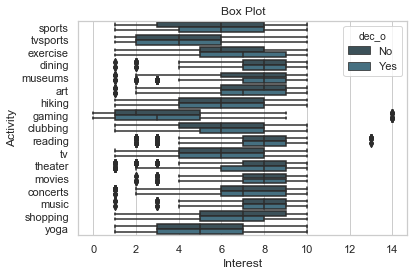

,sum_sq,df,F,PR(>F),eta_sq,omega_sq
Terms,,,,,,
Activity,132804.264670,16.0,1655.3,0,0.273889,0.273721
dec_o,0.286061,1.0,0.0570482,0.811224,5.89958e-07,-9.75133e-06
Activity:dec_o,616.697718,16.0,7.68664,1.52458e-18,0.00127185,0.00110637
Residuals,351461.707615,70091.0,,,,


,Activity,dec_o,count,missing,min,25%,mean,50%,75%,max,sd,skew,kurtosis,normality_p,normality
Interest,art,No,2169.0,29,1.0,6.0,7.251268,8.0,9.0,10.0,0.114104,-8.532671,70.806474,0.0,Reject H0
Interest,art,Yes,1956.0,30,1.0,6.0,7.184560,7.0,9.0,10.0,0.121974,-7.950807,61.215337,0.0,Reject H0
Interest,clubbing,No,2169.0,29,1.0,4.0,5.822960,6.0,8.0,10.0,0.114104,-8.532671,70.806474,0.0,Reject H0
Interest,clubbing,Yes,1956.0,30,1.0,5.0,5.985174,6.0,8.0,10.0,0.121974,-7.950807,61.215337,0.0,Reject H0
Interest,concerts,No,2169.0,29,1.0,6.0,7.164131,7.0,9.0,10.0,0.114104,-8.532671,70.806474,0.0,Reject H0
Interest,concerts,Yes,1956.0,30,1.0,6.0,7.036810,7.0,9.0,10.0,0.121974,-7.950807,61.215337,0.0,Reject H0
Interest,dining,No,2169.0,29,1.0,7.0,8.138774,8.0,9.0,10.0,0.114104,-8.532671,70.806474,0.0,Reject H0
Interest,dining,Yes,1956.0,30,1.0,7.0,8.156442,8.0,9.0,10.0,0.121974,-7.950807,61.215337,0.0,Reject H0
Interest,exercise,No,2169.0,29,1.0,5.0,6.250346,6.0,8.0,10.0,0.114104,-8.532671,70.806474,0.0,Reject H0
Interest,exercise,Yes,1956.0,30,1.0,5.0,6.673313,7.0,9.0,10.0,0.121974,-7.950807,61.215337,0.0,Reject H0


In [9]:
k.kruskal_table(df_female_interests_dec, sort=True)
i, d, p = trivariate.analysis(df_female_interests_dec_long, x='Activity', y='Interest', z='dec_o')
p
i
d

## Interests Correlation and Decision
There was no statistically significant difference in the association of interest correlation and decision between the genders. Nor was there a significant difference in decision, without controlling for gender.

### Interests Correlation and Decision

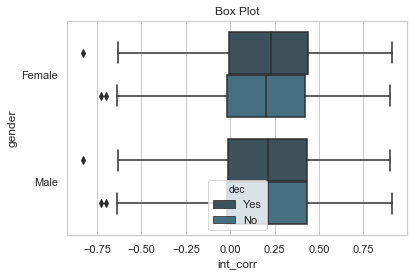

,gender,dec,count,missing,min,25%,mean,50%,75%,max,sd,skew,kurtosis,normality_p,normality
int_corr,Female,No,2606.0,49,-0.73,-0.0200,0.189693,0.20,0.42,0.90,0.134592,-7.155591,49.202476,0.0,Reject H0
int_corr,Female,Yes,1499.0,30,-0.83,-0.0050,0.207785,0.23,0.44,0.91,0.138693,-6.927242,45.986680,0.0,Reject H0
int_corr,Male,No,2163.0,42,-0.73,-0.0200,0.193079,0.21,0.43,0.91,0.136692,-7.037003,47.519417,0.0,Reject H0
int_corr,Male,Yes,1952.0,37,-0.83,-0.0125,0.198648,0.21,0.43,0.90,0.135116,-7.125708,48.775712,0.0,Reject H0


,sum_sq,df,F,PR(>F),eta_sq,omega_sq
Terms,,,,,,
gender,0.006911,1.0,0.0750178,0.784173,9.12647e-06,-0.000112517
dec,0.265870,1.0,2.88588,0.0893969,0.000351089,0.000229404
gender:dec,0.077436,1.0,0.840525,0.359274,0.000102256,-1.9399e-05
Residuals,756.922324,8216.0,,,,


In [10]:
i, d, p = trivariate.analysis(df, x='int_corr', y='gender', z='dec')
p
d
i